In [110]:
# importing python libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
# importing the csv file
df = pd.read_csv('preprocessed_data_Assignment_2.csv')

In [3]:
# checking the first 10 rows of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [4]:
# checking the size of data
df.shape

(32950, 14)

In [5]:
# finding all the columns datatypes
df.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
campaign       int64
poutcome       int64
y              int64
dtype: object

In [6]:
# findging the duplicated data present in our dataset, So we can remove it directly before going futher because it will 
# create bias for our machine learning model
len(df[df.duplicated()])

55

In [7]:
# as we have 55 rows of duplicate data so i am going to drop it 
df.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

In [8]:
# finding is there any null values in my data set so I can handle it 
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64

In [112]:
# finding the statical summery of the data to understand the dataset
df.describe()

,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,poutcome,y
count,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000,32895.000000
mean,3.635902,1.169327,3.706095,0.000091,0.547621,0.365679,4.234291,2.000243,227.683508,2.189056,0.929381,0.112449
std,3.548516,0.603259,2.081256,0.009550,0.497735,0.481627,2.319703,1.400366,158.547010,1.362061,0.364444,0.315922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,103.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,4.000000,2.000000,180.000000,2.000000,1.000000,0.000000
75%,7.000000,2.000000,6.000000,0.000000,1.000000,1.000000,6.000000,3.000000,319.000000,3.000000,1.000000,0.000000
max,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,9.000000,4.000000,550.000000,5.000000,2.000000,1.000000


<AxesSubplot:>

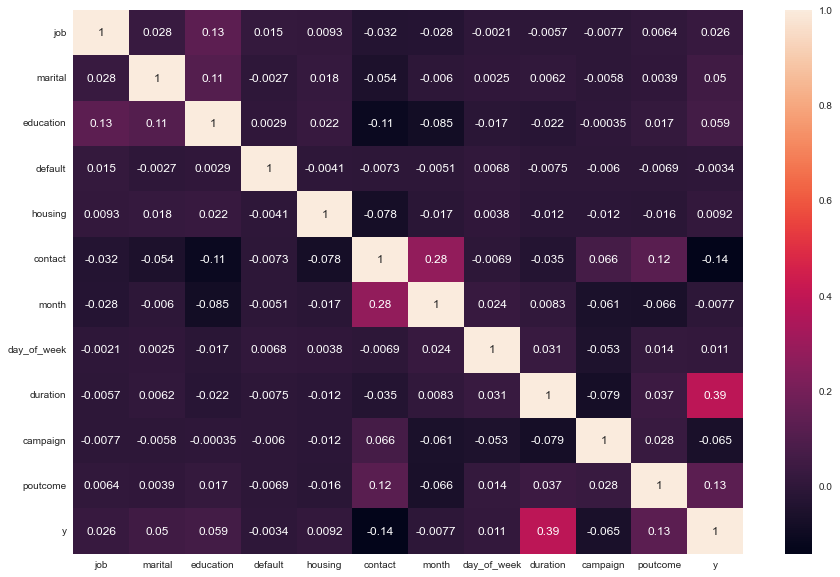

In [115]:
# finding the correlation of the features so we can check multicollinearity of the dataset 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [11]:
# as per the correlation we can drop two of the freatures age, loan 
# Age-> as age is highly correlated with the marital and has less correlation with the y so we can drop this
# loan -> loan has less correlation with y as it has only 0.00013 so we can drop this column also
df.drop(columns = ['loan', 'age'], inplace = True)

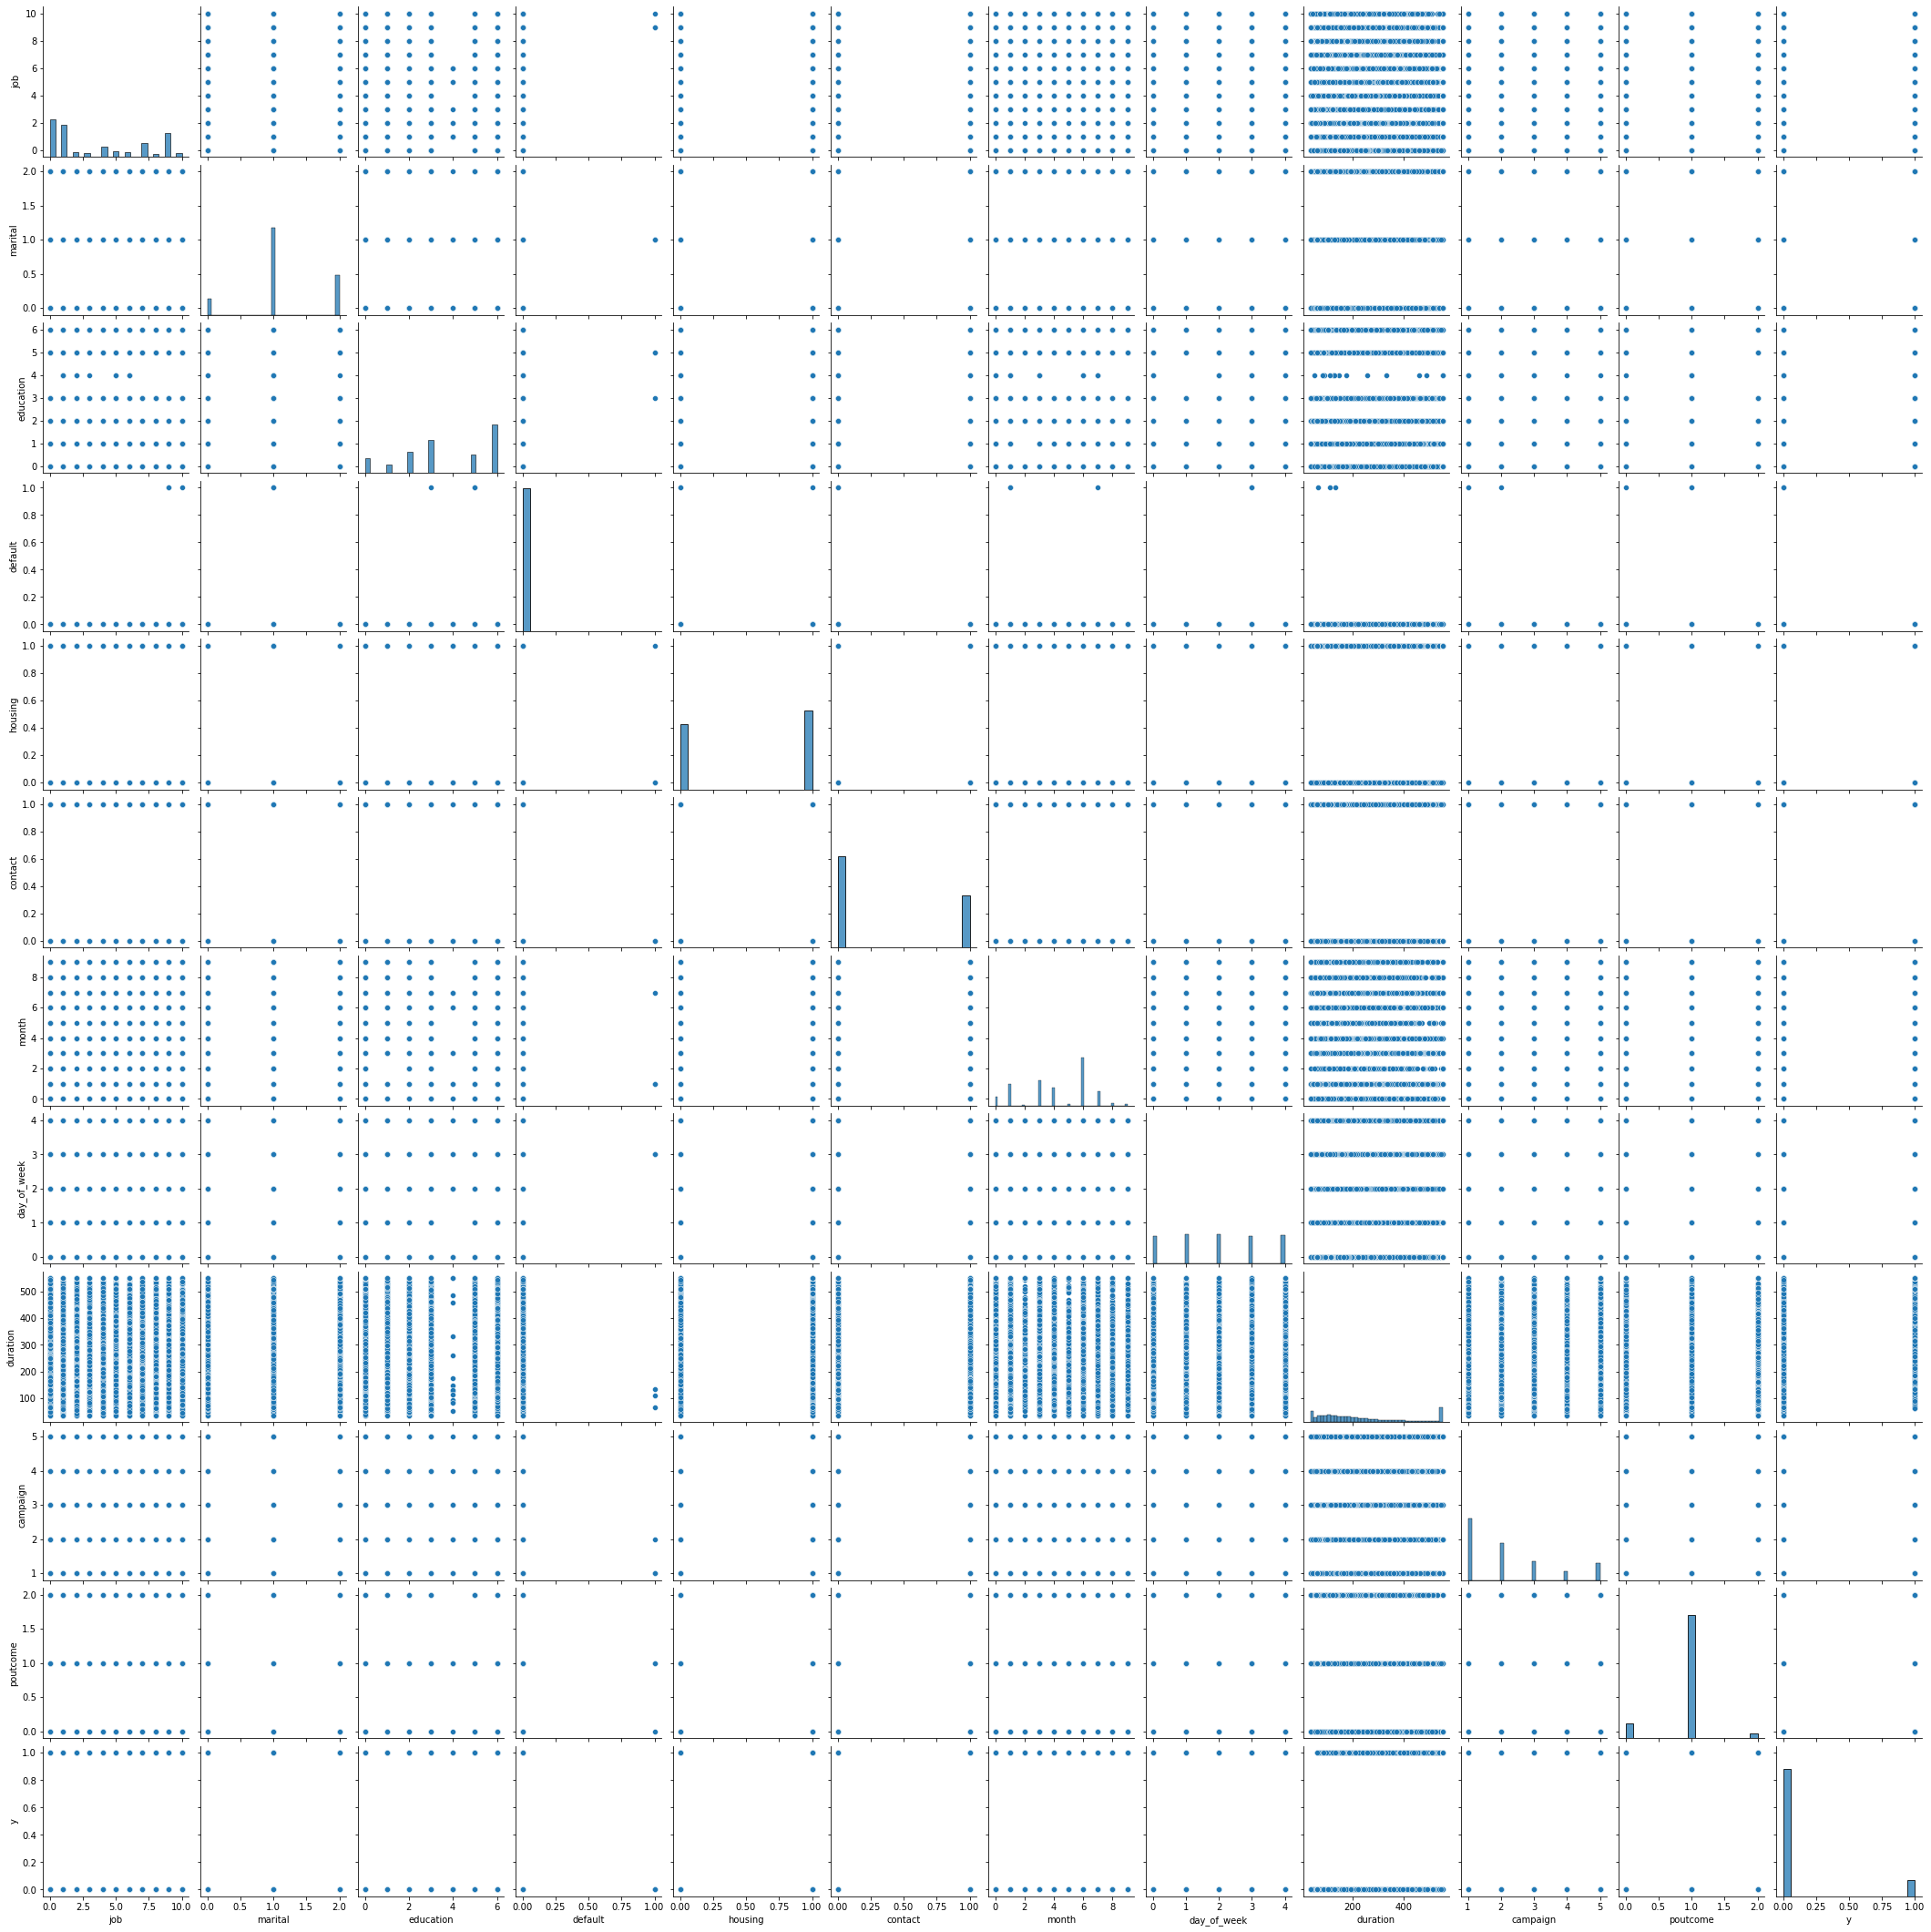

In [12]:
sns.pairplot(df)

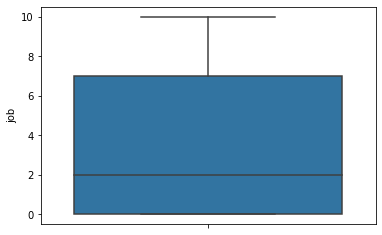

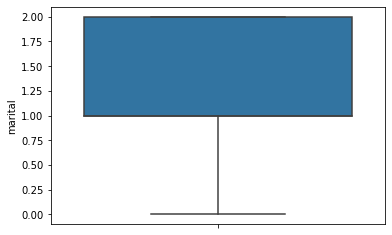

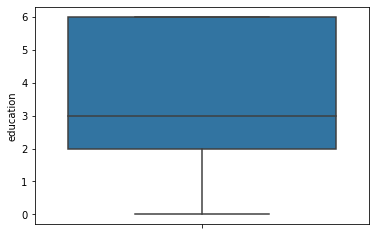

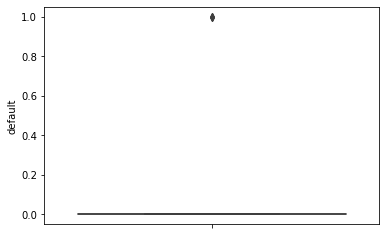

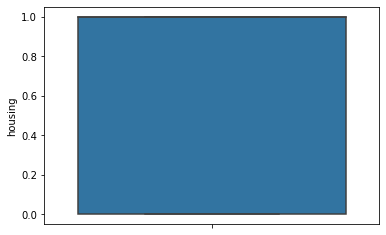

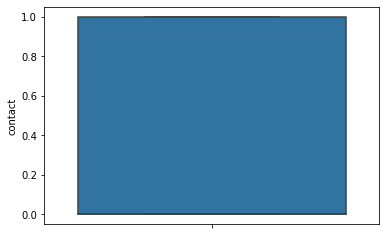

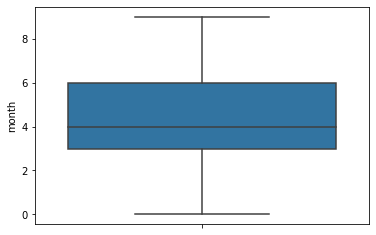

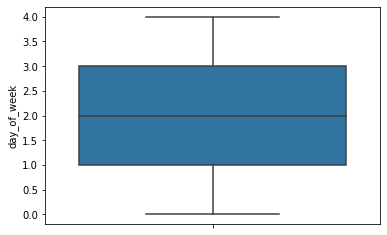

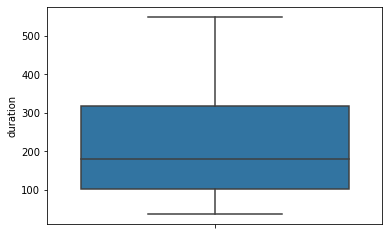

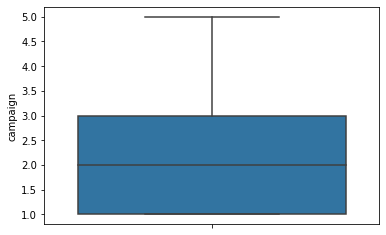

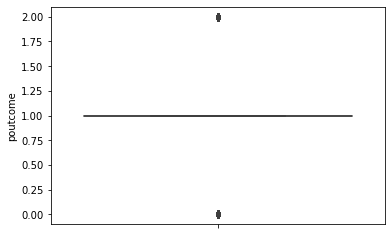

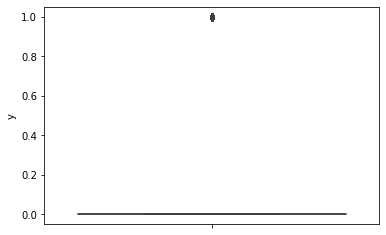

In [13]:
# checking the outliers in the dataset
for i in df.columns:
    plt.figure()
    sns.boxplot(data = df, y = i)

In [14]:
# As per the all box plot I can find that there is no outliers in my data so no need to handle it

In [15]:
# deviding dataset into x- independent features , y- dependent feature
x = df.iloc[:, :-1]
y = df['y']

In [16]:
# dividing dataset into train and test 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=20)

In [17]:
# applying scalling to our data
sc = StandardScaler() 
x_train = sc.fit_transform(xtrain)
x_test = sc.transform(xtest)

#  Logistic Regression

In [18]:
# Instantiate Logistic Regression
lg = LogisticRegression()

In [19]:
# training the logistic regression model
lg.fit(xtrain, ytrain)

C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# testing model on test data
ypred = lg.predict(xtest)

In [21]:
# printing classfication report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5837
           1       0.51      0.12      0.19       742

    accuracy                           0.89      6579
   macro avg       0.70      0.55      0.57      6579
weighted avg       0.85      0.89      0.86      6579



In [22]:
# finding roc_auc_score
roc_auc_score(ytest, ypred)

0.5526062478094247

# Decision Tree

In [23]:
# Instantiate Decision Tree Classifier
dtc = DecisionTreeClassifier()

In [24]:
# training our Decision Tree model
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [25]:
# testing our model on test data
y_pred_dtc = dtc.predict(xtest)

In [26]:
# printing classification report
print(classification_report(ytest, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5837
           1       0.45      0.47      0.46       742

    accuracy                           0.87      6579
   macro avg       0.69      0.70      0.69      6579
weighted avg       0.88      0.87      0.88      6579



In [27]:
# printing ruc_auc_score
roc_auc_score(y_pred_dtc, ytest)

0.6891114025922056

# k means cluster

In [28]:
# copy our old dataset
new_df = df.copy()

In [29]:
# apply standerd scalling 
sc = StandardScaler()
new_df = sc.fit_transform(new_df)
new_df

array([[-0.74282938, -0.28069052, -0.8197555 , ...,  1.32958199,
         0.19377403, -0.35594303],
       [-0.46101718, -0.28069052,  1.10219006, ..., -0.13880362,
        -2.55017641, -0.35594303],
       [ 0.38441943, -0.28069052, -1.78072828, ..., -0.87299643,
         0.19377403,  2.80943838],
       ...,
       [-1.02464158, -0.28069052, -0.8197555 , ...,  1.32958199,
         0.19377403, -0.35594303],
       [-1.02464158, -0.28069052,  1.10219006, ..., -0.87299643,
         0.19377403, -0.35594303],
       [-1.02464158, -0.28069052,  1.10219006, ...,  0.59538919,
         0.19377403, -0.35594303]])

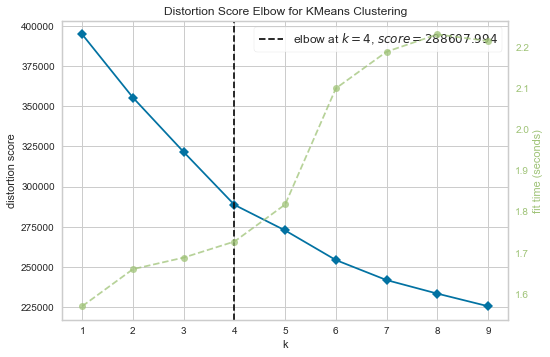

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Instantiate Kmeans and finding the number of clusters with the help of elbow method
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(new_df)        # Fit the data to the visualizer
visualizer.show()

In [31]:
# Instantiate Kmeans with 4 clusters
kmeans = KMeans(4)

In [32]:
# training our model
kmeans.fit(new_df)

KMeans(n_clusters=4)

In [33]:
# testing model
y_pred_k = kmeans.predict(new_df)

In [35]:
# checking roc_auc_score
roc_auc_score(y, y_pred_k)

0.0007930293420856572

# svm

In [36]:
# Instantiate support vector classifier
sv = SVC()

In [37]:
# training model
sv.fit(xtrain, ytrain)

SVC()

In [38]:
# testing model on the test data
y_pred_svm = sv.predict(xtest)

In [39]:
# printing classification report
print(classification_report(ytest, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5837
           1       0.00      0.00      0.00       742

    accuracy                           0.89      6579
   macro avg       0.44      0.50      0.47      6579
weighted avg       0.79      0.89      0.83      6579



C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# checking roc_auc_score
roc_auc_score(ytest, y_pred_svm)

0.5

In [41]:
# Instantiate support vector classifier with the linera kernal
sv = SVC(kernel='linear')
# training model
sv.fit(xtrain, ytrain)
# testing model on the test data
y_pred_svml = sv.predict(xtest)
print(classification_report(ytest, y_pred_svml))
roc_auc_score(ytest, y_pred_svml)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5837
           1       0.00      0.00      0.00       742

    accuracy                           0.89      6579
   macro avg       0.44      0.50      0.47      6579
weighted avg       0.79      0.89      0.83      6579



C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

In [42]:
# Instantiate support vector classifier with the polynomial kernal
sv = SVC(kernel='poly')
# training model
sv.fit(xtrain, ytrain)
# testing model on the test data
y_pred_svmp = sv.predict(xtest)
print(classification_report(ytest, y_pred_svmp))
roc_auc_score(ytest, y_pred_svmp)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5837
           1       0.00      0.00      0.00       742

    accuracy                           0.89      6579
   macro avg       0.44      0.50      0.47      6579
weighted avg       0.79      0.89      0.83      6579



C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

# Random Forest

In [44]:
# create paramters for random_grid and 
n_est = [int(x) for x in np.linspace(10,100, num = 10)]
max_feat = ['sqrt', 'log2']
max_dep = [int(x) for x in np.linspace(10,40, num = 12)]
min_samp_split = [6,10,15,20]
min_sam_leaf = [5,10,12]
crit = ['entropy', 'gini']

In [45]:
# assign all the above parameters to the random_grid
random_grid = {'n_estimators' : n_est, 
               'max_features': max_feat,
              'max_depth': max_dep,
              'min_samples_split' : min_samp_split,
              'min_samples_leaf' : min_sam_leaf,
              'criterion' : crit}

In [46]:
# Instantiate Random Forest Classifier
rfc = RandomForestClassifier()

In [47]:
# Instantiate Randomized Search CV 
rscv = RandomizedSearchCV(estimator = rfc, param_distributions= random_grid, n_iter= 100, cv=5, n_jobs= -1)

In [48]:
# fit the randomized search cv to our dataset
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 12, 15, 18, 20, 23,
                                                      26, 29, 31, 34, 37, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 12],
                                        'min_samples_split': [6, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [49]:
# getting best parameters from the random search CV
rscv.best_params_

{'n_estimators': 30,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 31,
 'criterion': 'gini'}

In [50]:
# Instantiate Random forest classifier with the best parameters of rscv
randomfc = RandomForestClassifier(n_estimators = 40,
 min_samples_split = 15,
 min_samples_leaf = 12,
 max_features = 'log2',
 max_depth = 10,
 criterion ='gini')

In [51]:
# training model
randomfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=12,
                       min_samples_split=15, n_estimators=40)

In [52]:
# testing the model
y_pred_rf = randomfc.predict(xtest)

In [53]:
# printing the classification model
print(classification_report(ytest, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5837
           1       0.65      0.25      0.36       742

    accuracy                           0.90      6579
   macro avg       0.78      0.62      0.65      6579
weighted avg       0.88      0.90      0.88      6579



In [54]:
# finding roc_auc_score
roc_auc_score(ytest, y_pred_rf)

0.6168565434649395

# naive bias

In [55]:
# Instantiate Gaussian Naive bias 
gnb = GaussianNB()

In [56]:
# training the model with train dataset
gnb.fit(xtrain, ytrain)

GaussianNB()

In [57]:
# predicting using model and printing classfication report
y_pred_gnb = gnb.predict(xtest)
print(classification_report(ytest, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5837
           1       0.41      0.59      0.48       742

    accuracy                           0.86      6579
   macro avg       0.67      0.74      0.70      6579
weighted avg       0.88      0.86      0.87      6579



In [58]:
# finding the roc_auc_score
roc_auc_score(ytest, y_pred_gnb)

0.7395660502039456

In [59]:
# Instantiate Multinomial Naive bias and training it with the train data set and get the prediction as well as 
# classification report
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
y_pred_mnb = mnb.predict(xtest)
print(classification_report(ytest, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5837
           1       0.28      0.62      0.38       742

    accuracy                           0.77      6579
   macro avg       0.61      0.71      0.62      6579
weighted avg       0.87      0.77      0.81      6579



In [60]:
# finding the roc_auc_score
roc_auc_score(ytest, y_pred_mnb)

0.7070719967933903

In [61]:
# Instantiate Bernoulli Naive bias and training it with the train data set and get the prediction as well as 
# classification report
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
y_pred_bnb = bnb.predict(xtest)
print(classification_report(ytest, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5837
           1       0.00      0.00      0.00       742

    accuracy                           0.89      6579
   macro avg       0.44      0.50      0.47      6579
weighted avg       0.79      0.89      0.83      6579



C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# finding the roc_auc_score
roc_auc_score(ytest, y_pred_bnb)

0.5

In [63]:
# Instantiate categorical Naive bias and training it with the train data set and get the prediction as well as 
# classification report
cnb = CategoricalNB()
cnb.fit(xtrain, ytrain)
y_pred_cnb = cnb.predict(xtest)
print(classification_report(ytest, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5837
           1       0.62      0.36      0.45       742

    accuracy                           0.90      6579
   macro avg       0.77      0.66      0.70      6579
weighted avg       0.89      0.90      0.89      6579



In [64]:
# finding the roc_auc_score 
roc_auc_score(ytest, y_pred_cnb)

0.6641919034027283

In [66]:
# As per the all the above model here are the roc_auc_score
print('Logistic_Regression', roc_auc_score(ytest, ypred))
print('Decision Tree', roc_auc_score(ytest, y_pred_dtc))
print('K means cluter', roc_auc_score(y, y_pred_k))
print('SVM-rfb', roc_auc_score(ytest, y_pred_svm))
print('SVM-linear', roc_auc_score(ytest, y_pred_svml))
print('SVM-poly', roc_auc_score(ytest, y_pred_svmp))
print('Random_forest', roc_auc_score(ytest, y_pred_rf))
print('GaussianNB', roc_auc_score(ytest, y_pred_gnb))
print('MultinomialNB', roc_auc_score(ytest, y_pred_mnb))
print('BernoulliNB', roc_auc_score(ytest, y_pred_bnb))
print('CategoricalNB', roc_auc_score(ytest, y_pred_cnb))

Logistic_Regression 0.5526062478094247
Decision Tree 0.6964053091926353
K means cluter 0.0007930293420856572
SVM-rfb 0.5
SVM-linear 0.5
SVM-poly 0.5
Random_forest 0.6168565434649395
GaussianNB 0.7395660502039456
MultinomialNB 0.7070719967933903
BernoulliNB 0.5
CategoricalNB 0.6641919034027283


In [67]:
# as per above data we can say that our top 6 best models are 
# 1->GaussianNB 
# 2-> MultinomialNB
# 3->Decision Tree
# 4->CategoricalNB
# 5->Random_forest
# 6-> Logistic_Regression

In [70]:
# if we check these models for which model more accurately predict 1 as well as 0
print('GaussianNB\n', classification_report(ytest, y_pred_gnb))
print('MultinomialNB\n', classification_report(ytest, y_pred_mnb))
print('Decision Tree\n', classification_report(ytest, y_pred_dtc))
print('CategoricalNB\n', classification_report(ytest, y_pred_cnb))
print('Random_forest\n', classification_report(ytest, y_pred_rf))
print('Logistic_Regression\n', classification_report(ytest, ypred))

GaussianNB
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      5837
           1       0.41      0.59      0.48       742

    accuracy                           0.86      6579
   macro avg       0.67      0.74      0.70      6579
weighted avg       0.88      0.86      0.87      6579

MultinomialNB
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      5837
           1       0.28      0.62      0.38       742

    accuracy                           0.77      6579
   macro avg       0.61      0.71      0.62      6579
weighted avg       0.87      0.77      0.81      6579

Decision Tree
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5837
           1       0.45      0.47      0.46       742

    accuracy                           0.87      6579
   macro avg       0.69      0.70      0.69      6579
weighted avg       0.88      0.8

In [71]:
# As per the above classfication reports we can say that MulitnomialNB failed to predict 1 correctly so we will not go futher
# with this model 

# It's also possible Imbalanced dataset affect the model 


In [72]:
# As there are three popular method availiable for imbalanced data handeling 
#1-> Undersampling-> we can not use this method because with this we have to drop a good amount of data which is not a good sign
#2-> Oversampling -> We can not use this as well because this method will create duplicate dataset which can create bias for model
#3-> so we are going to use smote method to handle imbalanced data set and test our best five models on new dataset

# Using Smote

<AxesSubplot:xlabel='y', ylabel='Count'>

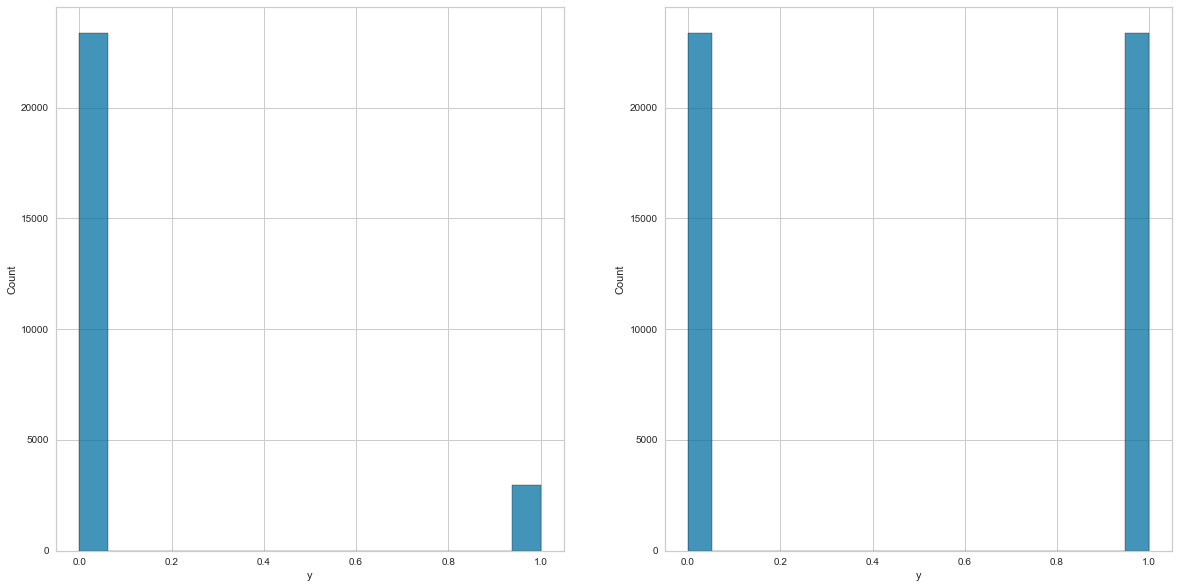

In [117]:
# Instantiate smote and training it with the train dataset and get the new xtrain and ytrain
X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(ytrain, ax = axes[0])
sns.histplot(y_resampled, ax = axes[1])
# from this graph we can see that now both values present in the data set are balanced

In [77]:
# Instantiate Gaussian Naive bias and training it with the new train data set and get the prediction as well as 
# classification report
gnbr = GaussianNB()
gnbr.fit(X_resampled, y_resampled)
y_pred_gnbr = gnbr.predict(xtest)
print(classification_report(ytest, y_pred_gnbr))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76      5837
           1       0.21      0.78      0.33       742

    accuracy                           0.65      6579
   macro avg       0.58      0.71      0.55      6579
weighted avg       0.87      0.65      0.71      6579



In [78]:
# Instantiate Desicion tree classifier and training it with the new train data set and get the prediction as well as 
# classification report
dtcr = DecisionTreeClassifier()
# training our Decision Tree model
dtcr.fit(X_resampled, y_resampled)
# testing our model on test data
y_pred_dtcr = dtcr.predict(xtest)
# printing classification report
print(classification_report(ytest, y_pred_dtcr))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5837
           1       0.34      0.50      0.40       742

    accuracy                           0.83      6579
   macro avg       0.64      0.69      0.65      6579
weighted avg       0.87      0.83      0.85      6579



In [79]:
# Instantiate categorical Naive bias and training it with the new train data set and get the prediction as well as 
# classification report
cnbr = CategoricalNB()
cnbr.fit(X_resampled, y_resampled)
y_pred_cnbr = cnbr.predict(xtest)
print(classification_report(ytest, y_pred_cnbr))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5837
           1       0.33      0.74      0.46       742

    accuracy                           0.80      6579
   macro avg       0.65      0.78      0.67      6579
weighted avg       0.89      0.80      0.83      6579



In [87]:
# Instantiate random forest classifier with the same hyper paramer and training it with the new train data set and get 
# the prediction as well as classification report
randomfcr = RandomForestClassifier(n_estimators = 40,
 min_samples_split = 15,
 min_samples_leaf = 12,
 max_features = 'log2',
 max_depth = 10,
 criterion ='gini')
randomfcr.fit(X_resampled, y_resampled)
y_pred_rfr = randomfcr.predict(xtest)
print(classification_report(ytest, y_pred_rfr))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5837
           1       0.35      0.79      0.48       742

    accuracy                           0.81      6579
   macro avg       0.66      0.80      0.68      6579
weighted avg       0.90      0.81      0.84      6579



In [88]:
# Instantiate logistic regression and training it with the new train dataset and get the prediction as well as 
# classification report
lgr = LogisticRegression()
lgr.fit(X_resampled, y_resampled)
y_pred_lgr = lgr.predict(xtest)
print(classification_report(ytest, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5837
           1       0.28      0.64      0.39       742

    accuracy                           0.77      6579
   macro avg       0.61      0.71      0.62      6579
weighted avg       0.87      0.77      0.81      6579



C:\Users\DEEPAK VERMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# printing new roc_auc_score with the old roc_auc_score for comparision
print('Logistic_Regression', roc_auc_score(ytest, y_pred_lgr), 'Old->',roc_auc_score(ytest, ypred))
print('Decision Tree', roc_auc_score(ytest, y_pred_dtcr), 'Old->',roc_auc_score(ytest, y_pred_dtc))
print('Random_forest', roc_auc_score(ytest, y_pred_rfr), 'Old->',roc_auc_score(ytest, y_pred_rf))
print('GaussianNB', roc_auc_score(ytest, y_pred_gnbr), 'Old->',roc_auc_score(ytest, y_pred_gnb))
print('CategoricalNB', roc_auc_score(ytest, y_pred_cnbr), 'Old->',roc_auc_score(ytest, y_pred_cnb))

Logistic_Regression 0.712868276405697 Old-> 0.5526062478094247
Decision Tree 0.6878961795442865 Old-> 0.6964053091926353
Random_forest 0.7982880148804424 Old-> 0.6168565434649395
GaussianNB 0.7052950621257551 Old-> 0.7395660502039456
CategoricalNB 0.7760622472035675 Old-> 0.6641919034027283


In [ ]:
# As per above obeservation we can see some model performs better after handlling the imbalanced dataset
# and some under perform

In [94]:
#lets create an ensemble and go with the majority rule to find the right prediction with this all model
# create a dataframe called pred_df and insert all the y_predicted values with the actual values
pred_df = pd.DataFrame(data = {'lg': y_pred_lgr, 'dtc': y_pred_dtcr, 'rf': y_pred_rfr, 'gnb': y_pred_gnbr,
                               'cnb': y_pred_cnbr, 'y_act': ytest})

In [103]:
# checking the pred_df
pred_df

,lg,dtc,rf,gnb,cnb,y_act,y_pred
30800,1,1,1,1,1,0,5.0
26409,0,0,0,0,0,0,0.0
31932,0,0,0,0,0,0,0.0
14100,0,0,0,0,0,0,0.0
14064,0,1,0,0,1,0,2.0
...,...,...,...,...,...,...,...
7084,0,0,0,0,0,0,0.0
28486,1,1,1,1,1,0,5.0
3948,0,0,0,0,0,0,0.0
3493,1,1,1,1,0,0,4.0


In [104]:
# creating a new_column with the name y_pred_sum and put sum of all the predicted_y values in it
pred_df['y_pred_sum'] = pred_df.T.iloc[:,:-1].sum()

In [106]:
# creating a new column with the name of y_pred and with the help of majority rule finding new y_pred
pred_df['y_pred'] = pred_df['y_pred_sum'].apply(lambda x: 1 if x >3 else 0) 

In [108]:
# checking roc_auc_score again to test result of our ensemble
roc_auc_score(pred_df['y_act'], pred_df['y_pred'])

0.8289536450018864

In [ ]:
# as we got 0.828 roc_auc_score so we can say that ensemble of all the models gives me a better result